In [26]:
import pandas as pd

Xtr = pd.read_csv('data/Xtr6.csv')
ytr = pd.read_csv('data/Ytr1.csv')
Xte = pd.read_csv('data/Xte6.csv')

In [98]:
Xtr1 = Xtr[['X.sales','cdate','fee1','fee2']].copy()
y = ytr['total']
Xte1 = Xte[['X.sales','cdate','fee1','fee2']].copy()

In [94]:
test = Xtr1.explode('X.sales')['X.sales'].value_counts()
test[1.0:15.0]

1.0     3888
2.0     1558
3.0      629
4.0      266
5.0      123
6.0       53
7.0       30
9.0       19
8.0       18
10.0      16
11.0      15
12.0      14
13.0      10
31.0       9
16.0       9
21.0       6
18.0       6
20.0       6
30.0       6
32.0       5
0.0        5
27.0       5
17.0       5
15.0       5
Name: X.sales, dtype: int64

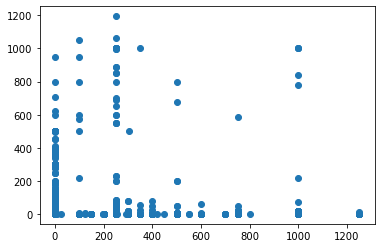

In [96]:
import matplotlib.pyplot as plt

plt.scatter(Xtr['fee1'], y)
plt.show()

In [137]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
Xtr2 = cat_encoder.fit_transform(Xtr1[['X.sales','cdate','fee1','fee2']])
Xte2 = cat_encoder.fit_transform(Xte1[['X.sales','cdate','fee1','fee2']])

In [104]:
tr1 = pd.get_dummies(Xtr1, columns = ['fee1','fee2'])
te1 = pd.get_dummies(Xte1, columns = ['fee1','fee2'])

In [103]:
tr1.shape

(6914, 59)

In [68]:
import numpy as np
Xtr2 = Xtr2.toarray()
Xte2 = Xte2.toarray()

In [69]:
Xte2.shape

(6914, 199)

In [70]:
Xtr2.shape

(6914, 222)

In [105]:
# Get missing columns in the training test
missing_cols = set( tr1.columns ) - set( te1.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    te1[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
train, test = tr1.align(te1, axis=1)

In [109]:
test.shape

(6914, 67)

In [115]:
tr2 = pd.get_dummies(Xtr1, columns = ['X.sales','fee1','fee2'])
te2 = pd.get_dummies(Xte1, columns = ['X.sales','fee1','fee2'])

In [118]:
te2.shape

(6914, 200)

In [123]:
# Get missing columns in the training test
missing_cols = set( tr2.columns ) - set( te2.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    te2[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
train1, test1 = tr2.align(te2, axis=1)

In [128]:
train1 = np.array(train1)
test1 = np.array(test1)

In [132]:
np.isnan(test1).any()

False

In [134]:
train1[np.isnan(train1)] = 0

In [138]:
def mae_out(model,train1):
    kfold = KFold(n_splits = 5,shuffle = True)
    a = np.zeros(shape = 5,dtype = int)
    i = 0
    for train_index, test_index in kfold.split(train1):
        X_train,X_test = train1[train_index],train1[test_index]
        y_train,y_test = y[train_index],y[test_index]
        model.fit(X_train,y_train)
        mae= mean_absolute_error(y_test,model.predict(X_test))
        a[i] = mae
        i = i+1
    return(np.mean(a))

In [31]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error


In [186]:
Xtr3 = pd.get_dummies(Xtr1, columns = ['X.sales','cdate','fee1','fee2'])
Xte3 = pd.get_dummies(Xte1, columns = ['X.sales','cdate','fee1','fee2'])

In [191]:
# Get missing columns in the training test
missing_cols = set( Xtr3.columns ) - set( Xte3.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    Xte3[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
train2, test2 = Xtr3.align(Xte3, axis=1)

C:\Users\Benson\AppData\Local\Temp/ipykernel_18344/1044732188.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Xte3[c] = 0


In [206]:
train2 = np.array(train2)
test2 = np.array(test2)

In [209]:
train2[np.isnan(train2)] = 0

In [211]:
sgd = SGDRegressor(loss = 'epsilon_insensitive', alpha = 0, epsilon = 0, max_iter = 3000)
print(mae_out(sgd,train2))

8.8


In [212]:
sgd.fit(train2,y)

SGDRegressor(alpha=0, epsilon=0, loss='epsilon_insensitive', max_iter=3000)

In [215]:
pred = pd.read_csv('data/pred.csv')
pred5 = pred.copy()
pred5['total'] = sgd.predict(test2)
pred5.to_csv('data/pred_dummyvar_reg.csv', index = False)

In [219]:
from sklearn.preprocessing import StandardScaler
Xtr4 = Xtr1.copy()
Xte4 = Xte1.copy()
scaler = StandardScaler()
Xtr4 = scaler.fit_transform(Xtr4)
Xte4 = scaler.transform(Xte4)